In [330]:
import requests
from bs4 import BeautifulSoup
import bs4
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from io import BytesIO
import re
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
import datetime
from selenium.webdriver.chrome.options import Options
import numpy as np
import random
from selenium.webdriver import ActionChains
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [331]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [332]:
import warnings
warnings.filterwarnings('ignore')

In [333]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("../creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("stock data")
sheet = sheet.worksheet("crypto")
df = pd.DataFrame(sheet.get_all_values())
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.replace('N/A', np.nan)
df= df.dropna()

In [334]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("../creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("stock data1")
sheet = sheet.worksheet("crypto")
df1 = pd.DataFrame(sheet.get_all_values())
df1.columns = df1.iloc[0]
df1 = df1.iloc[1:]
df1 = df1.replace('N/A', np.nan)
df1= df1.dropna()


In [335]:
allData = df.append(df1)
allData

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
1,BTC-USD,Bitcoin USD,"18,409.24",-74.29,-0.40%,341.802B,32.801B,32.801B,32.801B,18.567M,Wed Dec 9 18:00:04 2020
2,ETH-USD,Ethereum USD,569.41,+3.62,+0.64%,64.78B,15.267B,15.267B,15.267B,113.768M,Wed Dec 9 18:00:04 2020
3,XRP-USD,XRP USD,0.5742,+0.0030,+0.52%,26.044B,12.553B,12.553B,12.553B,45.355B,Wed Dec 9 18:00:04 2020
4,USDT-USD,Tether USD,1.0003,-0.0001,-0.01%,19.759B,56.357B,56.357B,56.357B,19.753B,Wed Dec 9 18:00:04 2020
5,LTC-USD,Litecoin USD,76.71,-0.21,-0.27%,5.067B,4.053B,4.053B,4.053B,66.053M,Wed Dec 9 18:00:04 2020
...,...,...,...,...,...,...,...,...,...,...,...
21017,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
21018,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
21019,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
21020,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [336]:
allData = allData.reset_index()
allData

,index,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
0,1,BTC-USD,Bitcoin USD,"18,409.24",-74.29,-0.40%,341.802B,32.801B,32.801B,32.801B,18.567M,Wed Dec 9 18:00:04 2020
1,2,ETH-USD,Ethereum USD,569.41,+3.62,+0.64%,64.78B,15.267B,15.267B,15.267B,113.768M,Wed Dec 9 18:00:04 2020
2,3,XRP-USD,XRP USD,0.5742,+0.0030,+0.52%,26.044B,12.553B,12.553B,12.553B,45.355B,Wed Dec 9 18:00:04 2020
3,4,USDT-USD,Tether USD,1.0003,-0.0001,-0.01%,19.759B,56.357B,56.357B,56.357B,19.753B,Wed Dec 9 18:00:04 2020
4,5,LTC-USD,Litecoin USD,76.71,-0.21,-0.27%,5.067B,4.053B,4.053B,4.053B,66.053M,Wed Dec 9 18:00:04 2020
...,...,...,...,...,...,...,...,...,...,...,...,...
25694,21017,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
25695,21018,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
25696,21019,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
25697,21020,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [337]:
allData = allData.drop(columns = ['index'])
allData

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
0,BTC-USD,Bitcoin USD,"18,409.24",-74.29,-0.40%,341.802B,32.801B,32.801B,32.801B,18.567M,Wed Dec 9 18:00:04 2020
1,ETH-USD,Ethereum USD,569.41,+3.62,+0.64%,64.78B,15.267B,15.267B,15.267B,113.768M,Wed Dec 9 18:00:04 2020
2,XRP-USD,XRP USD,0.5742,+0.0030,+0.52%,26.044B,12.553B,12.553B,12.553B,45.355B,Wed Dec 9 18:00:04 2020
3,USDT-USD,Tether USD,1.0003,-0.0001,-0.01%,19.759B,56.357B,56.357B,56.357B,19.753B,Wed Dec 9 18:00:04 2020
4,LTC-USD,Litecoin USD,76.71,-0.21,-0.27%,5.067B,4.053B,4.053B,4.053B,66.053M,Wed Dec 9 18:00:04 2020
...,...,...,...,...,...,...,...,...,...,...,...
25694,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
25695,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
25696,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
25697,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [338]:
# allData.to_csv('../crypto.csv',encoding='utf-8', index=False)

In [339]:
df = allData

In [340]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if "," in x:
        x = x.replace(',', '')
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'T' in x:
        if len(x) > 1:
            return float(x.replace('T', '')) * 1000000000
        return 1000000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return float(x)

In [341]:
df["Total Volume All Currencies (24Hr)"] = [value_to_float(x) for x in df["Total Volume All Currencies (24Hr)"]]
df["Volume in Currency (Since 0:00 UTC)"] = [value_to_float(x) for x in df["Volume in Currency (Since 0:00 UTC)"]]
df["Volume in Currency (24Hr)"] = [value_to_float(x) for x in df["Volume in Currency (24Hr)"]]
df['Circulating Supply'] = [value_to_float(x) for x in df['Circulating Supply']]
df['52 Week Range'] = [value_to_float(x) for x in df['52 Week Range']]

In [342]:
df['Change'] = [s.replace(',', '').replace('+', '') for s in df['Change']]
df["Price (Intraday)"] = [s.replace(',', '') for s in df["Price (Intraday)"]]

In [343]:
df['time'] = [datetime.datetime.strptime(s[4:], '%b %d %H:%M:%S %Y') for s in df['time']]

In [344]:
rbh = ['BSV-USD','BTC-USD', 'BCH-USD','LTC-USD','ETH-USD']

In [345]:
df = df.astype({'Change': float, "Price (Intraday)": float, "Total Volume All Currencies (24Hr)": float, "Volume in Currency (Since 0:00 UTC)": float, "Volume in Currency (24Hr)": float, 'Circulating Supply':float,'52 Week Range': float})


In [346]:
df = df.drop(columns = '% Change')

In [347]:
df['day of week'] = [t.weekday() for t in df['time']]
df

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week
0,BTC-USD,Bitcoin USD,18409.2400,-74.2900,3.418020e+11,3.280100e+10,3.280100e+10,3.280100e+10,1.856700e+07,2020-12-09 18:00:04,2
1,ETH-USD,Ethereum USD,569.4100,3.6200,6.478000e+10,1.526700e+10,1.526700e+10,1.526700e+10,1.137680e+08,2020-12-09 18:00:04,2
2,XRP-USD,XRP USD,0.5742,0.0030,2.604400e+10,1.255300e+10,1.255300e+10,1.255300e+10,4.535500e+10,2020-12-09 18:00:04,2
3,USDT-USD,Tether USD,1.0003,-0.0001,1.975900e+10,5.635700e+10,5.635700e+10,5.635700e+10,1.975300e+10,2020-12-09 18:00:04,2
4,LTC-USD,Litecoin USD,76.7100,-0.2100,5.067000e+09,4.053000e+09,4.053000e+09,4.053000e+09,6.605300e+07,2020-12-09 18:00:04,2
...,...,...,...,...,...,...,...,...,...,...,...
25694,DASH-USD,Dash USD,64.5700,-1.6900,5.982860e+08,4.563800e+08,4.563800e+08,4.563800e+08,9.265000e+06,2020-01-12 22:30:04,6
25695,MIOTA-USD,IOTA USD,0.1895,-0.0017,5.268010e+08,4.303000e+06,4.303000e+06,4.303000e+06,2.780000e+09,2020-01-12 22:30:04,6
25696,VET-USD,VeChain USD,0.0055,-0.0000,3.031710e+08,9.279800e+07,9.279800e+07,9.279800e+07,5.545500e+10,2020-01-12 22:30:04,6
25697,XEM-USD,NEM USD,0.0335,-0.0000,3.011070e+08,3.467000e+06,3.467000e+06,3.467000e+06,9.000000e+09,2020-01-12 22:30:04,6


In [348]:
df['hour of day'] = [t.hour for t in df['time']]
df
df = df[df['hour of day'] != 22]


In [349]:
df['timedelta'] = [(datetime.datetime.now() - x).total_seconds() for x in df['time']]

In [350]:
df['6 hour diff'] = df.groupby('Symbol')['Price (Intraday)'].diff() * -1

In [351]:
df['% 6 hour diff'] = df['6 hour diff']/ (df['Price (Intraday)'] - df['6 hour diff']) * 100

In [352]:
oneHotDOW = pd.get_dummies(df['day of week'],prefix='dow')
oHDOWcols = oneHotDOW.columns


In [353]:
df[list(oHDOWcols)] = oneHotDOW

In [354]:
oneHotHOD = pd.get_dummies(df['hour of day'],prefix='hod')
oHHODcols = oneHotHOD.columns

In [355]:
df[list(oHHODcols )] = oneHotHOD

In [356]:
dfNoOH = df.iloc[:,:15]
dfNoOH 

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
0,BTC-USD,Bitcoin USD,18409.2400,-74.2900,3.418020e+11,3.280100e+10,3.280100e+10,3.280100e+10,1.856700e+07,2020-12-09 18:00:04,2,18,1.198126e+04,NaN,NaN
1,ETH-USD,Ethereum USD,569.4100,3.6200,6.478000e+10,1.526700e+10,1.526700e+10,1.526700e+10,1.137680e+08,2020-12-09 18:00:04,2,18,1.198126e+04,NaN,NaN
2,XRP-USD,XRP USD,0.5742,0.0030,2.604400e+10,1.255300e+10,1.255300e+10,1.255300e+10,4.535500e+10,2020-12-09 18:00:04,2,18,1.198126e+04,NaN,NaN
3,USDT-USD,Tether USD,1.0003,-0.0001,1.975900e+10,5.635700e+10,5.635700e+10,5.635700e+10,1.975300e+10,2020-12-09 18:00:04,2,18,1.198126e+04,NaN,NaN
4,LTC-USD,Litecoin USD,76.7100,-0.2100,5.067000e+09,4.053000e+09,4.053000e+09,4.053000e+09,6.605300e+07,2020-12-09 18:00:04,2,18,1.198126e+04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25674,DASH-USD,Dash USD,64.8100,-1.4600,6.004830e+08,4.528090e+08,4.528090e+08,4.528090e+08,9.265000e+06,2020-01-13 00:00:08,0,0,2.867518e+07,0.4800,0.746153
25675,MIOTA-USD,IOTA USD,0.1885,-0.0028,5.239890e+08,4.328000e+06,4.328000e+06,4.328000e+06,2.780000e+09,2020-01-13 00:00:08,0,0,2.867518e+07,-0.0006,-0.317292
25676,VET-USD,VeChain USD,0.0055,-0.0001,3.027000e+08,9.091300e+07,9.091300e+07,9.091300e+07,5.545500e+10,2020-01-13 00:00:08,0,0,2.867518e+07,-0.0001,-1.785714
25677,XEM-USD,NEM USD,0.0334,-0.0001,3.003970e+08,3.457000e+06,3.457000e+06,3.457000e+06,9.000000e+09,2020-01-13 00:00:08,0,0,2.867518e+07,-0.0001,-0.298507


In [357]:
df = df.drop(columns = 'hour of day')
df = df.drop(columns = 'day of week')

In [1087]:
eth = dfNoOH[dfNoOH['Symbol'] == 'ETH-USD']
eth

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
1,ETH-USD,Ethereum USD,569.41,3.62,6.478000e+10,1.526700e+10,1.526700e+10,1.526700e+10,113768000.0,2020-12-09 18:00:04,2,18,1.198126e+04,NaN,NaN
21,ETH-USD,Ethereum USD,573.53,0.84,6.524800e+10,1.586000e+10,1.586000e+10,1.586000e+10,113767000.0,2020-12-09 12:00:44,2,12,3.354126e+04,-4.12,-0.713235
41,ETH-USD,Ethereum USD,571.12,7.37,6.497100e+10,1.791300e+10,1.791300e+10,1.791300e+10,113761000.0,2020-12-09 06:00:06,2,6,5.517926e+04,2.41,0.423766
61,ETH-USD,Ethereum USD,540.40,-10.48,6.147400e+10,1.482900e+10,1.482900e+10,1.482900e+10,113758000.0,2020-12-09 00:00:04,2,0,7.678126e+04,30.72,6.027311
81,ETH-USD,Ethereum USD,548.10,-0.13,6.234900e+10,1.537200e+10,1.537200e+10,1.537200e+10,113754000.0,2020-12-08 18:00:03,1,18,9.838226e+04,-7.70,-1.385390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25580,ETH-USD,Ethereum USD,149.64,5.51,1.635100e+10,9.933000e+09,9.933000e+09,9.933000e+09,109271000.0,2020-01-14 00:00:06,1,0,2.858878e+07,3.78,2.591526
25600,ETH-USD,Ethereum USD,147.27,3.13,1.609200e+10,9.062000e+09,9.062000e+09,9.062000e+09,109267000.0,2020-01-13 18:00:05,0,18,2.861038e+07,2.37,1.635611
25620,ETH-USD,Ethereum USD,143.94,-2.85,1.572700e+10,8.288000e+09,8.288000e+09,8.288000e+09,109264000.0,2020-01-13 12:00:06,0,12,2.863198e+07,3.33,2.368253
25640,ETH-USD,Ethereum USD,143.64,-3.15,1.569400e+10,8.460000e+09,8.460000e+09,8.460000e+09,109261000.0,2020-01-13 06:00:06,0,6,2.865358e+07,0.30,0.209293


In [1088]:
eth = eth.sort_values('time')


In [1089]:
eth = eth.set_index('time')

In [1090]:
eth = eth.drop(columns=['Change', 'timedelta', '6 hour diff', '% 6 hour diff'])
eth

,Symbol,Name,Price (Intraday),Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,day of week,hour of day
time,,,,,,,,,,
2020-01-13 00:00:08,ETH-USD,Ethereum USD,143.82,1.571300e+10,8.418000e+09,8.418000e+09,8.418000e+09,109257000.0,0,0
2020-01-13 06:00:06,ETH-USD,Ethereum USD,143.64,1.569400e+10,8.460000e+09,8.460000e+09,8.460000e+09,109261000.0,0,6
2020-01-13 12:00:06,ETH-USD,Ethereum USD,143.94,1.572700e+10,8.288000e+09,8.288000e+09,8.288000e+09,109264000.0,0,12
2020-01-13 18:00:05,ETH-USD,Ethereum USD,147.27,1.609200e+10,9.062000e+09,9.062000e+09,9.062000e+09,109267000.0,0,18
2020-01-14 00:00:06,ETH-USD,Ethereum USD,149.64,1.635100e+10,9.933000e+09,9.933000e+09,9.933000e+09,109271000.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-08 18:00:03,ETH-USD,Ethereum USD,548.10,6.234900e+10,1.537200e+10,1.537200e+10,1.537200e+10,113754000.0,1,18
2020-12-09 00:00:04,ETH-USD,Ethereum USD,540.40,6.147400e+10,1.482900e+10,1.482900e+10,1.482900e+10,113758000.0,2,0
2020-12-09 06:00:06,ETH-USD,Ethereum USD,571.12,6.497100e+10,1.791300e+10,1.791300e+10,1.791300e+10,113761000.0,2,6


In [1091]:
# For simplicity I just take the target variable and the date
steps_ahead = 3
cols = ['Price (Intraday)', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)',
       'Total Volume All Currencies (24Hr)', 'Circulating Supply',
       '52 Week Range']
# cols = ['Price (Intraday)']
sa = steps_ahead
# eth = eth[['Price (Intraday)']]

eth = eth[cols]
# Log value
for col in cols:
    eth['log_' + col] = np.log(eth[col])
# Add previous n-values
n = 3
for i in range(n):
    for col in cols:
        eth[col + '_lag_' + str(i+sa)] = eth[col].shift(i+sa)
        # For simplicity we drop the null values 
        eth.dropna(inplace=True)
        eth['log_' + col + '_lag_' + str(i+sa)] = np.log(eth[col + '_lag_' + str(i+sa)])
        if i == 0:
            eth['log_' + col + '_difference_' + str(i+sa)] = eth['log_' + col] - eth['log_' + col + '_lag_' + str(i+sa)]
        else:
            eth['log_' + col + '_difference_' + str(i+sa)] = eth['log_' + col + '_lag_' + str(i+sa - 1)] - eth['log_' + col + '_lag_' + str(i+sa)]
eth.tail(10)

,Price (Intraday),Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,log_Price (Intraday),log_Volume in Currency (Since 0:00 UTC),log_Volume in Currency (24Hr),log_Total Volume All Currencies (24Hr),...,log_Volume in Currency (24Hr)_difference_5,Total Volume All Currencies (24Hr)_lag_5,log_Total Volume All Currencies (24Hr)_lag_5,log_Total Volume All Currencies (24Hr)_difference_5,Circulating Supply_lag_5,log_Circulating Supply_lag_5,log_Circulating Supply_difference_5,52 Week Range_lag_5,log_52 Week Range_lag_5,log_52 Week Range_difference_5
time,,,,,,,,,,,,,,,,,,,,,
2020-12-07 12:00:03,587.98,6.687500e+10,1.139600e+10,1.139600e+10,1.139600e+10,113737000.0,6.376693,24.926091,23.156528,23.156528,...,-0.216063,1.291200e+10,23.281423,-0.216063,1.291200e+10,23.281423,-0.216063,113720000.0,18.549250,0.000035
2020-12-07 18:00:04,590.24,6.713400e+10,1.105500e+10,1.105500e+10,1.105500e+10,113741000.0,6.380529,24.929956,23.126149,23.126149,...,0.146140,1.040300e+10,23.065360,0.146140,1.040300e+10,23.065360,0.146140,113724000.0,18.549285,0.000026
2020-12-08 00:00:04,588.74,6.696600e+10,1.162000e+10,1.162000e+10,1.162000e+10,113744000.0,6.377985,24.927451,23.175994,23.175994,...,-0.036195,1.204000e+10,23.211500,-0.036195,1.204000e+10,23.211500,-0.036195,113727000.0,18.549311,0.000035
2020-12-08 06:00:05,578.37,6.578800e+10,1.383800e+10,1.383800e+10,1.383800e+10,113747000.0,6.360214,24.909703,23.350684,23.350684,...,0.098265,1.161200e+10,23.175305,0.098265,1.161200e+10,23.175305,0.098265,113731000.0,18.549347,0.000026
2020-12-08 12:00:04,571.55,6.501500e+10,1.256200e+10,1.256200e+10,1.256200e+10,113751000.0,6.348352,24.897884,23.253942,23.253942,...,-0.117042,1.281100e+10,23.273570,-0.117042,1.281100e+10,23.273570,-0.117042,113734000.0,18.549373,0.000026
2020-12-08 18:00:03,548.10,6.234900e+10,1.537200e+10,1.537200e+10,1.537200e+10,113754000.0,6.306458,24.856013,23.455814,23.455814,...,-0.030380,1.139600e+10,23.156528,-0.030380,1.139600e+10,23.156528,-0.030380,113737000.0,18.549399,0.000035
2020-12-09 00:00:04,540.40,6.147400e+10,1.482900e+10,1.482900e+10,1.482900e+10,113758000.0,6.292310,24.841880,23.419851,23.419851,...,0.049845,1.105500e+10,23.126149,0.049845,1.105500e+10,23.126149,0.049845,113741000.0,18.549434,0.000026
2020-12-09 06:00:06,571.12,6.497100e+10,1.791300e+10,1.791300e+10,1.791300e+10,113761000.0,6.347599,24.897207,23.608793,23.608793,...,0.174691,1.162000e+10,23.175994,0.174691,1.162000e+10,23.175994,0.174691,113744000.0,18.549461,0.000026
2020-12-09 12:00:44,573.53,6.524800e+10,1.586000e+10,1.586000e+10,1.586000e+10,113767000.0,6.351810,24.901461,23.487066,23.487066,...,-0.096742,1.383800e+10,23.350684,-0.096742,1.383800e+10,23.350684,-0.096742,113747000.0,18.549487,0.000035


In [1092]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1,2,1)
# plt.plot(eth['Price (Intraday)'])
# plt.title('Original Time Series')
# plt.subplot(1,2,2)
# plt.plot(eth.log_difference_1)
# plt.title('Log first difference Time Series')

In [1093]:

inclCols = cols

In [1094]:
newCols = []
for col in inclCols:
    for i in range(sa+1,n+sa):
        newCols.append('log_' + col + '_difference_' + str(i))
newCols

['log_Price (Intraday)_difference_4',
 'log_Price (Intraday)_difference_5',
 'log_Volume in Currency (Since 0:00 UTC)_difference_4',
 'log_Volume in Currency (Since 0:00 UTC)_difference_5',
 'log_Volume in Currency (24Hr)_difference_4',
 'log_Volume in Currency (24Hr)_difference_5',
 'log_Total Volume All Currencies (24Hr)_difference_4',
 'log_Total Volume All Currencies (24Hr)_difference_5',
 'log_Circulating Supply_difference_4',
 'log_Circulating Supply_difference_5',
 'log_52 Week Range_difference_4',
 'log_52 Week Range_difference_5']

In [1095]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

# Forecast difference of log values
X, Y = eth[newCols], eth['log_Price (Intraday)_difference_' + str(sa)]

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
mdl_adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
mdl_adaboost.fit(X_train, Y_train)

# Make predictions
pred = mdl_adaboost.predict(X_test)

test_size = X_test.shape[0]
test_size

228

In [1097]:
np.exp(eth.tail(test_size)['log_Price (Intraday)_lag_' + str(sa)]) 

time
2020-10-11 18:00:04    372.19
2020-10-12 00:00:03    373.34
2020-10-12 06:00:05    375.06
2020-10-12 12:00:04    374.06
2020-10-12 18:00:04    373.42
                        ...  
2020-12-08 18:00:03    588.74
2020-12-09 00:00:04    578.37
2020-12-09 06:00:06    571.55
2020-12-09 12:00:44    548.10
2020-12-09 18:00:04    540.40
Name: log_Price (Intraday)_lag_3, Length: 228, dtype: float64

In [1110]:
 eth.tail(test_size)['Price (Intraday)'][:-3]

time
2020-12-05 00:00:04    586.23
2020-12-05 06:00:04    586.56
2020-12-05 12:00:04    594.38
2020-12-05 18:00:04    604.08
2020-12-06 00:00:04    600.47
2020-12-06 06:04:27    587.80
2020-12-06 12:04:29    595.91
2020-12-06 18:04:30    595.62
2020-12-07 00:00:03    600.27
2020-12-07 06:00:05    596.09
2020-12-07 12:00:03    587.98
2020-12-07 18:00:04    590.24
2020-12-08 00:00:04    588.74
2020-12-08 06:00:05    578.37
2020-12-08 12:00:04    571.55
2020-12-08 18:00:03    548.10
2020-12-09 00:00:04    540.40
Name: Price (Intraday), dtype: float64

time
2020-12-05 00:00:04    597.913211
2020-12-05 06:00:04    589.678638
2020-12-05 12:00:04    566.327846
2020-12-05 18:00:04    593.637509
2020-12-06 00:00:04    599.815766
2020-12-06 06:04:27    590.638059
2020-12-06 12:04:29    596.176292
2020-12-06 18:04:30    596.762975
2020-12-07 00:00:03    589.669470
2020-12-07 06:00:05    591.190550
2020-12-07 12:00:03    590.489692
2020-12-07 18:00:04    604.814110
2020-12-08 00:00:04    597.032910
2020-12-08 06:00:05    592.583775
2020-12-08 12:00:04    580.908941
2020-12-08 18:00:03    589.911319
2020-12-09 00:00:04    584.510341
2020-12-09 06:00:06    569.374914
2020-12-09 12:00:44    478.510221
2020-12-09 18:00:04    530.694864
Name: log_Price (Intraday)_lag_3, dtype: float64

Text(0.5, 1.0, 'Predicted vs Real with log difference values')

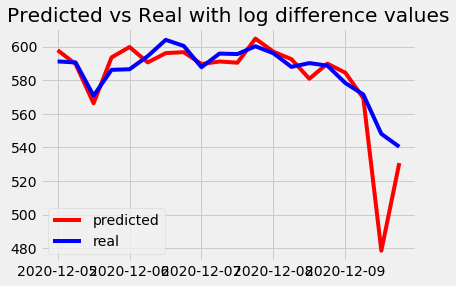

In [1111]:
test_size = X_test.shape[0]
plt.plot(eth.tail(test_size).index[-20:], np.exp(eth.tail(test_size)['log_Price (Intraday)_lag_' + str(sa)]  + pred)[-20:], label='predicted', color='red')
plt.plot(eth.tail(test_size).index[-20:], eth.tail(test_size)['Price (Intraday)'][-23:-sa], label='real', color='blue')
plt.legend(loc='best')
plt.title('Predicted vs Real with log difference values')

In [1114]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

X, Y = np.array(eth[newCols]), np.array(eth['log_Price (Intraday)_difference_' + str(sa)])

# Initialize a TimeSeriesSplitter
tscv = TimeSeriesSplit(n_splits=5)

# Retrieve log_sales_index and sales_index to unstransform data
eth_log_sales_index = np.array(eth.copy().reset_index()['log_Price (Intraday)_lag_'+ str(sa)])
eth_sales_index = np.array(eth.copy().reset_index()['Price (Intraday)_lag_'+ str(sa)])

# Dict to store metric value at every iteration
metric_iter = {}
for idx, val in enumerate(tscv.split(X)):
        train_i, test_i = val
        X_train, X_test = X[train_i], X[test_i]
        Y_train, Y_test = Y[train_i], Y[test_i]
        # Initialize the estimator
        mdl_adaboost = AdaBoostRegressor(n_estimators=900, learning_rate=0.15)
        # Fit the data
        mdl_adaboost.fit(X_train, Y_train)
        # Make predictions
        pred = mdl_adaboost.predict(X_test)
        # Unstransform predictions
        pred_untransform = [np.exp(val_test + val_pred) for val_test, val_pred in zip(eth_log_sales_index[test_i], pred)]
        # Real value
        real = eth_sales_index[test_i]
        # Store metric
        metric_iter[f'iter_{idx + 1}'] = mean_absolute_error(real, pred_untransform)

In [1124]:
len(real)

189

In [1116]:
list(pred_untransform)

[372.28868503095674,
 385.28464857325685,
 385.72564206826223,
 401.88440719648423,
 394.37429062295394,
 398.38646162757783,
 409.616282393687,
 419.6391064105392,
 410.2475088365238,
 419.71490409598454,
 420.10199545410785,
 405.8862753654089,
 403.6912178756104,
 411.08925685232754,
 416.1051033844998,
 411.53960277789395,
 413.4589547849164,
 411.37232404824385,
 414.2071715944849,
 406.4148863954046,
 411.3635018307321,
 408.6720774597886,
 392.2527623628444,
 399.83208941626305,
 398.2702811908948,
 407.3659052120373,
 410.035428596692,
 402.2966950527977,
 402.4259942904711,
 392.9176487772049,
 385.1495701628815,
 388.17844072890455,
 395.89561071888403,
 386.87300222809625,
 384.70591406471306,
 387.1607532169883,
 385.2815290486425,
 384.6171593634175,
 385.82151861952815,
 381.01123290511185,
 396.809625559106,
 396.5152445320583,
 388.2130736937766,
 383.51229264125783,
 375.8890725950598,
 383.18349018964363,
 380.2928417946005,
 381.20370175266714,
 383.10294855323355,
 

In [1125]:
test = pd.DataFrame({'prior': list(real), 'pred':list(pred_untransform), 'actual': pd.Series(real).shift(sa) , 'pred_log': pred, 'firstX' : X_test[:,0],'secondX':  X_test[:,1]}).iloc[sa:]
test.tail(20)

,prior,pred,actual,pred_log,firstX,secondX
169,591.23,598.689949,613.67,0.012539,-0.023519,-0.012934
170,590.63,590.287170,613.18,-0.000581,-0.001015,-0.023519
171,570.82,568.110325,605.30,-0.004758,-0.034116,-0.001015
172,586.23,593.215087,591.23,0.011845,0.026638,-0.034116
173,586.56,596.428278,590.63,0.016684,0.000563,0.026638
174,594.38,590.072184,570.82,-0.007274,0.013244,0.000563
175,604.08,595.739880,586.23,-0.013903,0.016188,0.013244
176,600.47,597.522028,586.56,-0.004922,-0.005994,0.016188
177,587.80,591.186024,594.38,0.005744,-0.021326,-0.005994
178,595.91,594.225302,604.08,-0.002831,0.013703,-0.021326


In [1067]:
print(f'Average MSE error: {np.mean(list(metric_iter.values()))}')

Average MSE error: 4.020907193270167


In [1068]:
accuracy = (sum((test['prior'] < test['pred']) & (test['prior'] < test['actual'])) + sum((test['prior'] >= test['pred']) & (test['prior'] >= test['actual']))) / len(test)
accuracy

0.45977011494252873

In [1069]:

steps_ahead = 1


sa = steps_ahead
# eth = eth[['Price (Intraday)']]

# eth = eth[cols]
# # Log value
# for col in cols:
#     eth['log_' + col] = np.log(eth[col])
# Add previous n-values
vs = []
n = 3
for i in range(n-1):
    for col in cols:
#         eth[col + '_lag_' + str(i+sa)] = eth[col].shift(i+sa)
#         eth.dropna(inplace=True)
#         eth['log_' + col + '_lag_' + str(i+sa)] = np.log(eth[col + '_lag_' + str(i+sa)])
        
        vs.append(eth['log_' + col][-1] - np.log(eth[col].shift(i+sa))[-1])
vs

[-0.007209508540126031,
 -0.007198480648860084,
 -0.03810657993189892,
 -0.03810657993189892,
 -0.03810657993189892,
 8.78985650487607e-06,
 -0.0029986081581547808,
 -0.0029441027500602956,
 -0.15983306995816093,
 -0.15983306995816093,
 -0.15983306995816093,
 6.153061809399674e-05]

In [1070]:
i =0
sa = 1

In [1071]:
eth['Price (Intraday)'].shift(i+sa)[-5]

571.55

In [1072]:
# newCols1 = []
# for col in inclCols:
#     for i in range(sa,n+sa-1):
#         newCols1.append('log_' + col + '_difference_' + str(i))


In [1073]:
# newCols1

In [1074]:
# eth[newCols1].iloc[-1]

In [1075]:
valToPred = np.array(vs)
valToPred

array([-7.20950854e-03, -7.19848065e-03, -3.81065799e-02, -3.81065799e-02,
       -3.81065799e-02,  8.78985650e-06, -2.99860816e-03, -2.94410275e-03,
       -1.59833070e-01, -1.59833070e-01, -1.59833070e-01,  6.15306181e-05])

In [1076]:
p1 = mdl_adaboost.predict(valToPred.reshape(-1, len(newCols)))

In [1077]:
np.exp(p1[0]) 

0.9812975584613813

In [1078]:
eth['Price (Intraday)'].iloc[-1]

569.41

In [1082]:
eth['Price (Intraday)'].iloc[-1]

569.41

In [1080]:
eth_sales_index[-1]

540.4

In [ ]:
np.exp(p1[0]) + eth_sales_index[-1]

In [1081]:
np.exp(p1[0]) +eth['Price (Intraday)'].iloc[-1]

541.3812975584614

In [1035]:
np.exp(p1[0]) + eth['Price (Intraday)'].iloc[-1]

570.4185534163358

In [1036]:
eth['Price (Intraday)'].iloc[-1]

569.41

In [1195]:
 data = df[df['Symbol'] ==  'ETH-USD']
data = data.sort_values('time')
data = data.set_index('time')
data = data.drop(columns=['Change', 'timedelta', '6 hour diff', '% 6 hour diff'])
data.columns

Index(['Symbol', 'Name', 'Price (Intraday)',
       'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)',
       'Total Volume All Currencies (24Hr)', 'Circulating Supply',
       '52 Week Range', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5',
       'dow_6', 'hod_0', 'hod_6', 'hod_12', 'hod_18'],
      dtype='object', name=0)

In [1221]:
def timeSeriesPred(symbol, depth, cols, includeDOWHOD, oneHot, ne, lr):
    if oneHot:
        data = df[df['Symbol'] == symbol]
    else:
        data = dfNoOH[dfNoOH['Symbol'] == symbol]
    data = data.sort_values('time')
    data = data.set_index('time')
    data = data.drop(columns=['Change', 'timedelta', '6 hour diff', '% 6 hour diff'])
    data
    if includeDOWHOD:
        if oneHot:
            finalCols = cols + ['dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5','dow_6', 'hod_0', 'hod_6', 'hod_12', 'hod_18']
        else:
            finalCols = cols + ['day of week'] + ['hour of day']
    else:
        finalCols = cols
        
    data = data[finalCols]
    
    for col in cols:
        data['log_' + col] = np.log(data[col])
    
    n = depth
    for i in range(n):
        for col in cols:
            data[col + '_lag_' + str(i+1)] = data[col].shift(i+1)
            data.dropna(inplace=True)
            data['log_' + col + '_lag_' + str(i+1)] = np.log(data[col + '_lag_' + str(i+1)])

            data['log_' + col + '_difference_' + str(i+1)] = data['log_' + col] - data['log_' + col + '_lag_' + str(i+1)]

    inclCols = cols
    newCols = []
    for col in inclCols:
        for i in range(2,n+1):
            newCols.append('log_' + col + '_difference_' + str(i))  

    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_absolute_error
    
    X, Y = np.array(data[finalCols]), np.array(data['log_Price (Intraday)_difference_1'])

    tscv = TimeSeriesSplit(n_splits=5)

    data_log_sales_index = np.array(data.copy().reset_index()['log_Price (Intraday)_lag_1'])
    data_sales_index = np.array(data.copy().reset_index()['Price (Intraday)_lag_1'])

    metric_iter = {}
    for idx, val in enumerate(tscv.split(X)):
            train_i, test_i = val
            X_train, X_test = X[train_i], X[test_i]
            Y_train, Y_test = Y[train_i], Y[test_i]
            mdl_adaboost = AdaBoostRegressor(n_estimators=ne, learning_rate=lr)
            mdl_adaboost.fit(X_train, Y_train)
            pred = mdl_adaboost.predict(X_test)
            pred_untransform = [np.exp(val_test + val_pred) for val_test, val_pred in zip(data_log_sales_index[test_i], pred)]
            real = data_sales_index[test_i]
            metric_iter[f'iter_{idx + 1}'] = mean_absolute_error(real, pred_untransform)     
    mse = round(np.mean(list(metric_iter.values())),2)

    test = pd.DataFrame({'prior': list(real), 'pred':list(pred_untransform), 'actual': pd.Series(real).shift(sa)})
    accuracy = (sum((test['prior'] < test['pred']) & (test['prior'] < test['actual'])) + sum((test['prior'] >= test['pred']) & (test['prior'] >= test['actual']))) / len(test)

    newCols1 = []
    for col in inclCols:
        for i in range(1,n):
            newCols1.append('log_' + col + '_difference_' + str(i))
    valToPred = np.array(data[finalCols].iloc[-1])
    p1 = mdl_adaboost.predict(valToPred.reshape(-1, len(finalCols)))
    currPrice = str(data['Price (Intraday)'].iloc[-1])

    predPrice = str(round(np.exp(p1[0]) + data['Price (Intraday)'].iloc[-1], 2))

    return [symbol, mse, accuracy, depth, len(cols), includeDOWHOD, oneHot,currPrice, predPrice]

In [1222]:
cols = ['Price (Intraday)', 'Volume in Currency (Since 0:00 UTC)', '52 Week Range','Circulating Supply','Volume in Currency (24Hr)',
           'Total Volume All Currencies (24Hr)']

In [1223]:
rbh = ['ETH-USD', 'BSV-USD','BTC-USD', 'BCH-USD','LTC-USD']

In [1224]:
np.arange(0.,1.0,.02)[1:]

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98])

In [1225]:
# vals = []
# for sym in rbh[:4]:
#     print(sym)
#     for d in range(3,4):
#         for s in range(1,8):
#             print(s)
#             for lr in range(1,500):
#                 for ne in range(1,500):
#                     vals.append(timeSeriesPred(sym, d, cols, s, lr, ne))

In [1227]:
range(1,500,10)

range(1, 500, 10)

In [ ]:
vals = []
for sym in rbh[:]:
    print(sym)
    for dowHod in [True, False]:
        for oneHot in [True, False]:
            for d in range(3,4):
                for s in range(3,5):
                    for lr in np.arange(0.,1.0,.02)[1:]:
                        print(lr)
                        for ne in range(50,500,50):
                            vals.append(timeSeriesPred(sym, d, cols[:s], dowHod, oneHot, ne, lr))
#                     vals.append(timeSeriesPred(sym, d, cols[:s], dowHod, oneHot))
        
        #COLS USED
#         for s in range(1,len(cols)):
#             vals.append(timeSeriesPred(sym, d, cols[:s]))

ETH-USD
0.02
0.04
0.06


In [ ]:
results = pd.DataFrame(vals)
results.columns = ['symbol', 'mse', 'accuracy', 'depth', 'len', 'dow hod included?', 'one hot?','current', 'predicted']
results

In [1215]:
results['current'] = [float(x) for x in results['current']]

In [1216]:
results['percentMSE'] = results['mse']/results['current']

In [1217]:
results.sort_values('accuracy', ascending = False).head(60)

,symbol,mse,accuracy,depth,len,dow hod included?,one hot?,current,predicted,percentMSE
15,BSV-USD,3.19,0.636364,3,4,False,False,169.15,170.15,0.018859
11,BSV-USD,3.19,0.636364,3,4,False,True,169.15,170.15,0.018859
23,BTC-USD,142.70,0.633333,3,4,False,False,18409.24,18410.24,0.007752
19,BTC-USD,142.05,0.633333,3,4,False,True,18409.24,18410.24,0.007716
18,BTC-USD,165.15,0.630332,3,3,False,True,18409.24,18410.24,0.008971
22,BTC-USD,174.58,0.630332,3,3,False,False,18409.24,18410.24,0.009483
13,BSV-USD,3.01,0.590909,3,4,True,False,169.15,170.16,0.017795
38,LTC-USD,0.33,0.568720,3,3,False,False,76.71,77.71,0.004302
36,LTC-USD,0.31,0.568720,3,3,True,False,76.71,77.71,0.004041
32,LTC-USD,0.33,0.568720,3,3,True,True,76.71,77.71,0.004302


In [898]:
# results = pd.DataFrame(vals)
# results.columns = ['symbol', 'mse', 'accuracy', 'depth', 'timesteps ahead', 'current', 'predicted']
# results

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [748]:
eth.tail(10)

,Price (Intraday),log_Price (Intraday),Price (Intraday)_lag_5,log_Price (Intraday)_lag_5,log_Price (Intraday)_difference_5,Price (Intraday)_lag_6,log_Price (Intraday)_lag_6,log_Price (Intraday)_difference_6,Price (Intraday)_lag_7,log_Price (Intraday)_lag_7,log_Price (Intraday)_difference_7
time,,,,,,,,,,,
2020-12-07 12:00:03,587.98,6.376693,587.80,6.376387,0.000306,600.47,6.397713,-0.021326,604.08,6.403707,-0.005994
2020-12-07 18:00:04,590.24,6.380529,595.91,6.390090,-0.009560,587.80,6.376387,0.013703,600.47,6.397713,-0.021326
2020-12-08 00:00:04,588.74,6.377985,595.62,6.389603,-0.011618,595.91,6.390090,-0.000487,587.80,6.376387,0.013703
2020-12-08 06:00:05,578.37,6.360214,600.27,6.397380,-0.037166,595.62,6.389603,0.007777,595.91,6.390090,-0.000487
2020-12-08 12:00:04,571.55,6.348352,596.09,6.390392,-0.042040,600.27,6.397380,-0.006988,595.62,6.389603,0.007777
2020-12-08 18:00:03,548.10,6.306458,587.98,6.376693,-0.070235,596.09,6.390392,-0.013699,600.27,6.397380,-0.006988
2020-12-09 00:00:04,540.40,6.292310,590.24,6.380529,-0.088220,587.98,6.376693,0.003836,596.09,6.390392,-0.013699
2020-12-09 06:00:06,571.12,6.347599,588.74,6.377985,-0.030385,590.24,6.380529,-0.002545,587.98,6.376693,0.003836
2020-12-09 12:00:44,573.53,6.351810,578.37,6.360214,-0.008404,588.74,6.377985,-0.017771,590.24,6.380529,-0.002545


In [723]:
results = pd.DataFrame(vals)
results.columns = ['symbol', 'mse', 'accuracy', 'depth', 'timesteps ahead', 'current', 'predicted']
results

,symbol,mse,accuracy,depth,timesteps ahead,current,predicted
0,ETH-USD,1.10,0.896373,3,1,569.41,570.41
1,ETH-USD,1.69,0.884211,3,1,569.41,570.41
2,ETH-USD,3.27,0.780749,3,1,569.41,570.4
3,ETH-USD,4.28,0.755435,3,1,569.41,570.36
4,ETH-USD,5.33,0.756906,3,1,569.41,570.38
5,ETH-USD,6.01,0.668539,3,1,569.41,570.3
6,ETH-USD,5.21,0.685714,3,1,569.41,570.31


In [ ]:
def timeSeriesPred(symbol, depth, cols, steps_ahead):
    data = dfNoOH[dfNoOH['Symbol'] == symbol]
    data = data.sort_values('time').iloc[:-3]
    data = data.set_index('time')
    data = data.drop(columns=['Change', 'timedelta', '6 hour diff', '% 6 hour diff'])
    data

    data = data[cols]
    for col in cols:
        data['log_' + col] = np.log(data[col])

        
    sa = steps_ahead
        
        
   
    # data = data[['Price (Intraday)']]

    
    # Add previous n-values
    n = depth
    for i in range(n):
        for col in cols:
            data[col + '_lag_' + str(i+sa)] = data[col].shift(i+sa)
            # For simplicity we drop the null values 
            data.dropna(inplace=True)
            data['log_' + col + '_lag_' + str(i+sa)] = np.log(data[col + '_lag_' + str(i+sa)])
            if i == 0:
                data['log_' + col + '_difference_' + str(i+sa)] = data['log_' + col] - data['log_' + col + '_lag_' + str(i+sa)]
            else:
                data['log_' + col + '_difference_' + str(i+sa)] = data['log_' + col + '_lag_' + str(i+sa - 1)] - data['log_' + col + '_lag_' + str(i+sa)]
        
        
#     n = depth
#     for i in range(n):
#         for col in cols:
#             data[col + '_lag_' + str(i+1)] = data[col].shift(i+1)
#             data.dropna(inplace=True)
#             data['log_' + col + '_lag_' + str(i+1)] = np.log(data[col + '_lag_' + str(i+1)])

#             data['log_' + col + '_difference_' + str(i+1)] = data['log_' + col] - data['log_' + col + '_lag_' + str(i+1)]

    inclCols = cols
    
    newCols = []
    for col in inclCols:
        for i in range(sa+1,n+sa):
            newCols.append('log_' + col + '_difference_' + str(i))
    newCols
    
    
    
#     newCols = []
#     for col in inclCols:
#         for i in range(2,n+1):
#             newCols.append('log_' + col + '_difference_' + str(i))  

    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_absolute_error

    X, Y = np.array(data[newCols]), np.array(data['log_Price (Intraday)_difference_' + str(sa)])

    tscv = TimeSeriesSplit(n_splits=5)

    data_log_sales_index = np.array(data.copy().reset_index()['log_Price (Intraday)_lag_' + str(sa)])
    data_sales_index = np.array(data.copy().reset_index()['Price (Intraday)_lag_' + str(sa)])

    metric_iter = {}
    for idx, val in enumerate(tscv.split(X)):
            train_i, test_i = val
            X_train, X_test = X[train_i], X[test_i]
            Y_train, Y_test = Y[train_i], Y[test_i]
            mdl_adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)
            mdl_adaboost.fit(X_train, Y_train)
            pred = mdl_adaboost.predict(X_test)
            pred_untransform = [np.exp(val_test + val_pred) for val_test, val_pred in zip(data_log_sales_index[test_i], pred)]
            real = data_sales_index[test_i]
            metric_iter[f'iter_{idx + 1}'] = mean_absolute_error(real, pred_untransform)     
    mse = round(np.mean(list(metric_iter.values())),2)

    test = pd.DataFrame({'prior': pd.Series(real).shift(), 'pred':list(pred_untransform), 'actual': list(real)}).iloc[1:]
    accuracy = (sum((test['prior'] < test['pred']) & (test['prior'] < test['actual'])) + sum((test['prior'] >= test['pred']) & (test['prior'] >= test['actual']))) / len(test)

#     newCols1 = []
#     for col in inclCols:
#         for i in range(sa,n+sa-1):
#             newCols1.append('log_' + col + '_difference_' + str(i))
    
    
    
#     newCols1 = []
#     for col in inclCols:
#         for i in range(1,n):
#             newCols1.append('log_' + col + '_difference_' + str(i))




#     steps_ahead = 1
    sa = 1
    vs = []
    n = 3
    for i in range(n-1):
        for col in cols:
            vs.append(data['log_' + col][-1] - np.log(data[col].shift(i+sa))[-1])
            
            
    valToPred = np.array(vs)
    p1 = mdl_adaboost.predict(valToPred.reshape(-1, len(newCols)))
    currPrice = str(data['Price (Intraday)'].iloc[-1])

    predPrice = str(round(np.exp(p1[0]) + data['Price (Intraday)'].iloc[-1], 2))

    return [symbol, mse, accuracy, depth, steps_ahead, currPrice, predPrice]